<a href="https://colab.research.google.com/github/Rachanabera/MNIST-Digit-Classification-/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **MSINT Handwritten Digit Classification using Deep Lraning (Neural Network)**

In [ ]:
Importing the dependencies


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow

from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


**Loading the Msint Data from keras.datasets.**


In [3]:
(X_train, Y_train),(X_test,Y_test)  =mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [6]:
print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 600000 images


Test Data = 10000 images


Image dimension --> 28 x 28

Grayscale Image --> 1channel


In [7]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(X_train[10].shape)

(28, 28)


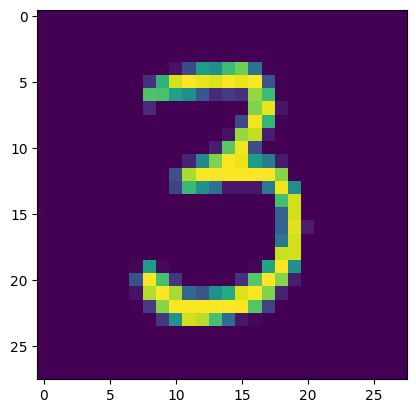

3


In [10]:
# displaying the image

plt.imshow(X_train[50])
plt.show()


print(Y_train[50])


Image Labels

In [11]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [13]:
# unique values in y_train and y_test
print(np.unique(Y_train))
print(np.unique(Y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use the labels as such we can also apply One Hot Encoding

All the images are the smae dimension in this dataset . If not , we have to resize the images to a common size

In [14]:
# scaling the values

X_train= X_train/255
X_test = X_test/255


In [15]:
# printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [16]:
# setting up the layers of the neural network

model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation ='relu'),
                          keras.layers.Dense(50, activation ='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
 ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# compiling the Neural Network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# traing the neural network

model.fit(X_train, Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9540 - loss: 0.1535
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9667 - loss: 0.1078
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9749 - loss: 0.0815
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9798 - loss: 0.0657
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9831 - loss: 0.0557
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9861 - loss: 0.0466
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9881 - loss: 0.0395
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9902 - loss: 0.0345
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9907 - loss: 0.0315
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9916 - loss: 0.0285


Traing data accuracy = 99.16%

**Accuracy on Test Data**

In [22]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9656 - loss: 0.1409
0.9689000248908997


Test Data Accuracy = 96.89 %

In [23]:
print(X_test.shape)

(10000, 28, 28)


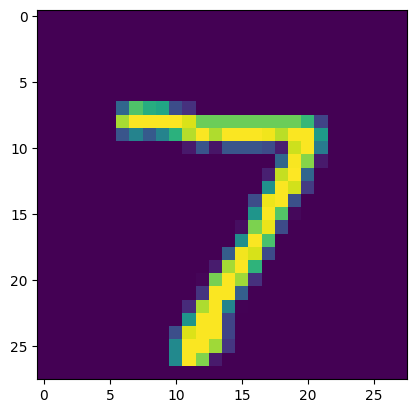

In [25]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [26]:
print(Y_test[0])

7


In [27]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [28]:
print(Y_pred.shape)

(10000, 10)


In [29]:
print(Y_pred[0])

[1.1480244e-05 8.7377684e-06 2.7514987e-02 7.3550773e-01 5.1911455e-05
 2.9339926e-05 1.5026005e-09 9.9999952e-01 8.6680397e-05 5.9215754e-01]


model.predict() gives the prediction probability of each class for that data point

In [30]:
# converting the prediction probability to the class label

label_for_first_image= np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [31]:
# converting the prediction probability to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(2), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [32]:
print(Y_pred)

[[1.1480244e-05 8.7377684e-06 2.7514987e-02 ... 9.9999952e-01
  8.6680397e-05 5.9215754e-01]
 [8.4891617e-06 9.9631637e-01 1.0000000e+00 ... 1.3323785e-06
  6.5688160e-03 2.3861698e-12]
 [5.6867930e-06 9.9998617e-01 1.3183931e-02 ... 4.6167746e-01
  2.0011814e-01 1.0922989e-02]
 ...
 [4.1934031e-10 2.8870500e-05 1.9542030e-08 ... 1.1683277e-01
  4.9106085e-05 5.4057789e-01]
 [2.8595774e-12 2.2553870e-06 1.4190509e-09 ... 1.1919983e-05
  9.4926965e-01 7.4840374e-02]
 [2.6078997e-04 4.8915108e-08 7.2252689e-05 ... 9.3446528e-11
  3.1206280e-04 9.8146957e-05]]


Y_test --> True Labels

Y_pred_label --> Predicted Labels

Confusion Matrix

In [39]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [40]:
print(conf_mat)

tf.Tensor(
[[ 954    0    2    1    5    0    2    1    1   14]
 [   0 1121    3    3    0    0    3    1    4    0]
 [   3    2  993   14    6    0    1    9    4    0]
 [   0    0    3  993    0    2    0    6    1    5]
 [   0    0    2    0  969    0    5    1    0    5]
 [   2    0    0   28    4  843    2    2    9    2]
 [   3    2    1    1    9    3  936    1    1    1]
 [   1    1    9    4    3    0    1  996    0   13]
 [   3    1    3   20    7    3    1    7  917   12]
 [   0    3    0    5   29    3    1    3    1  964]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

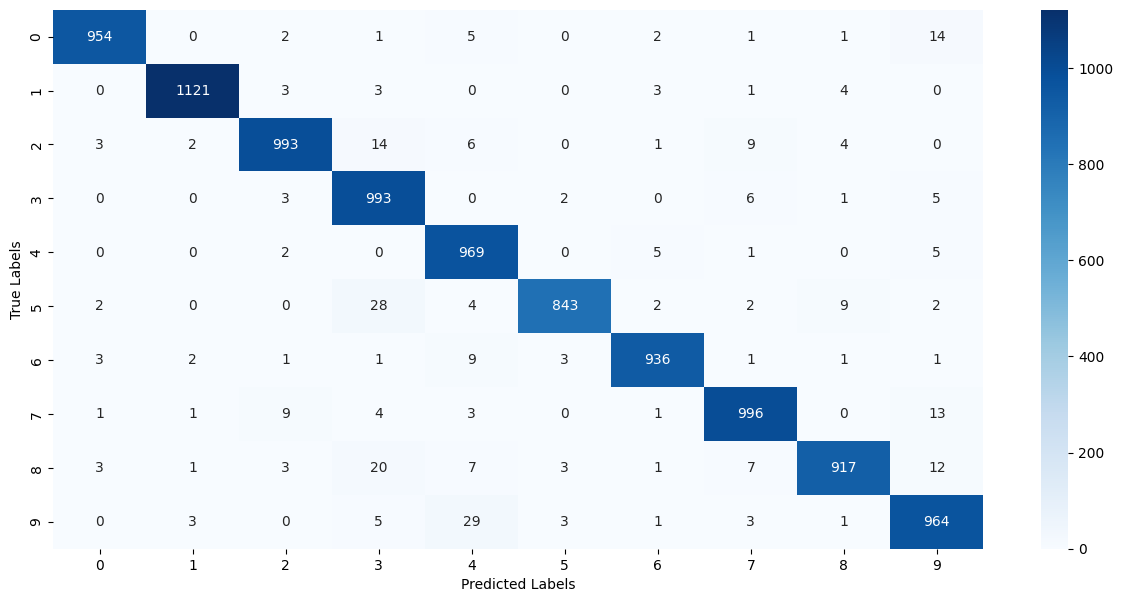

In [46]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True, cmap="Blues",fmt="d")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building the predictive System

In [47]:
input_image_path = '/content/MNIST_digit.png'
input_image=cv2.imread(input_image_path)

In [48]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

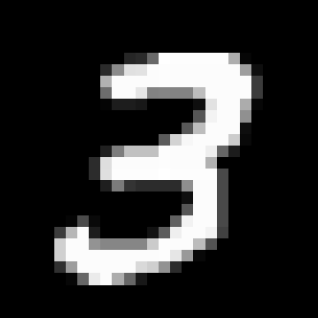

In [56]:
cv2_imshow(input_image)

In [57]:
input_image.shape

(318, 318, 3)

In [59]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [60]:
grayscale.shape

(318, 318)

In [61]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [62]:
print(input_image_resize.shape)

(28, 28)


In [63]:
cv2_imshow(input_image_resize)

In [64]:
input_image_resize=input_image_resize/255

In [65]:
image_reshape = np.reshape(input_image_resize,[1,28,28])

In [66]:
input_prediction = model.predict(image_reshape)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[6.0828972e-15 7.2330789e-07 3.0561554e-07 1.0000000e+00 2.9541203e-10
  1.3127967e-03 6.9812937e-21 3.2661278e-03 1.1638773e-03 8.9601940e-01]]


In [67]:
input_prediction_label = [np.argmax(input_prediction)]
print(input_prediction_label)

[np.int64(3)]


  Predictive System

Enter the path of the image to be predicted:/content/MNIST_digit.png


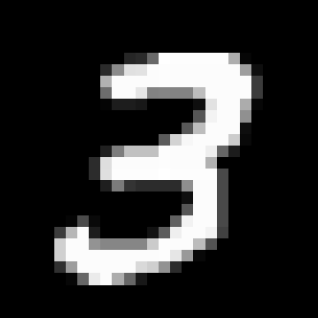

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The Handwritten Digit is recognised as: 3


In [69]:
input_image_path=input("Enter the path of the image to be predicted:")
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
input_image_resize=input_image_resize/255
image_reshape=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshape)
input_prediction_label=[np.argmax(input_prediction)]
print("The Handwritten Digit is recognised as:",input_prediction_label[0])